In [10]:
import pandas as pd
import numpy as np
import warnings
from helpers import load_data
import ast
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

DATA_PATH = 'data/'

# Load the data
loaded_data = load_data(DATA_PATH)

movie_metadata = loaded_data['movie_metadata']
city_country_analysis = loaded_data['city_country_analysis']
cities_movies = city_country_analysis['cities_movies']
countries_movies = city_country_analysis['countries_movies']

In [11]:
def get_genres_by_locations(locations_movies):
    location_genre_count = {}
    
    for location, movie_ids in locations_movies.items():
        genre_count = {}

        for movie_id in movie_ids:
            try:
                genres = list(ast.literal_eval(movie_metadata.loc[movie_metadata["Wikipedia movie ID"] == int(movie_id), "Movie genres (Freebase ID:name tuples)"].values[0]).values())
                
                for genre_name in genres:
                    genre_count[genre_name] = genre_count.get(genre_name, 0) + 1
            except:
                pass
        location_genre_count[location] = genre_count
    
    return location_genre_count

In [12]:
city_genre = get_genres_by_locations(cities_movies)
country_genre = get_genres_by_locations(countries_movies)

In [13]:
# show genres with >= 1% representation
THRESHOLD = 0.01

def visualize_genres(location, genres):
    total_count = sum(genres.values())

    # Filter out genres with less than 1% and sort them from highest to lowest
    filtered_genres_counts = {genre: count for genre, count in genres.items() if (count / total_count) >= 0.01}
    sorted_genres_counts = dict(sorted(filtered_genres_counts.items(), key=lambda item: item[1], reverse=True))

    # Data for the bar chart
    labels = list(sorted_genres_counts.keys())
    sizes = list(sorted_genres_counts.values())

    # Creating the bar chart
    plt.figure(figsize=(16, 8))  # Adjusted for better aspect ratio
    bars = plt.bar(labels, sizes)

    # Adding title
    plt.title(f'Movie Genre Distribution in {location} (Genres > 1%)')  # Changed to 1% as per your filter

    # Rotating the x labels so they don't overlap
    plt.xticks(rotation=90)

    # Adding labels for the y-axis
    plt.ylabel('Percentage')

    # Adding percentages on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/total_count:.1%}', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

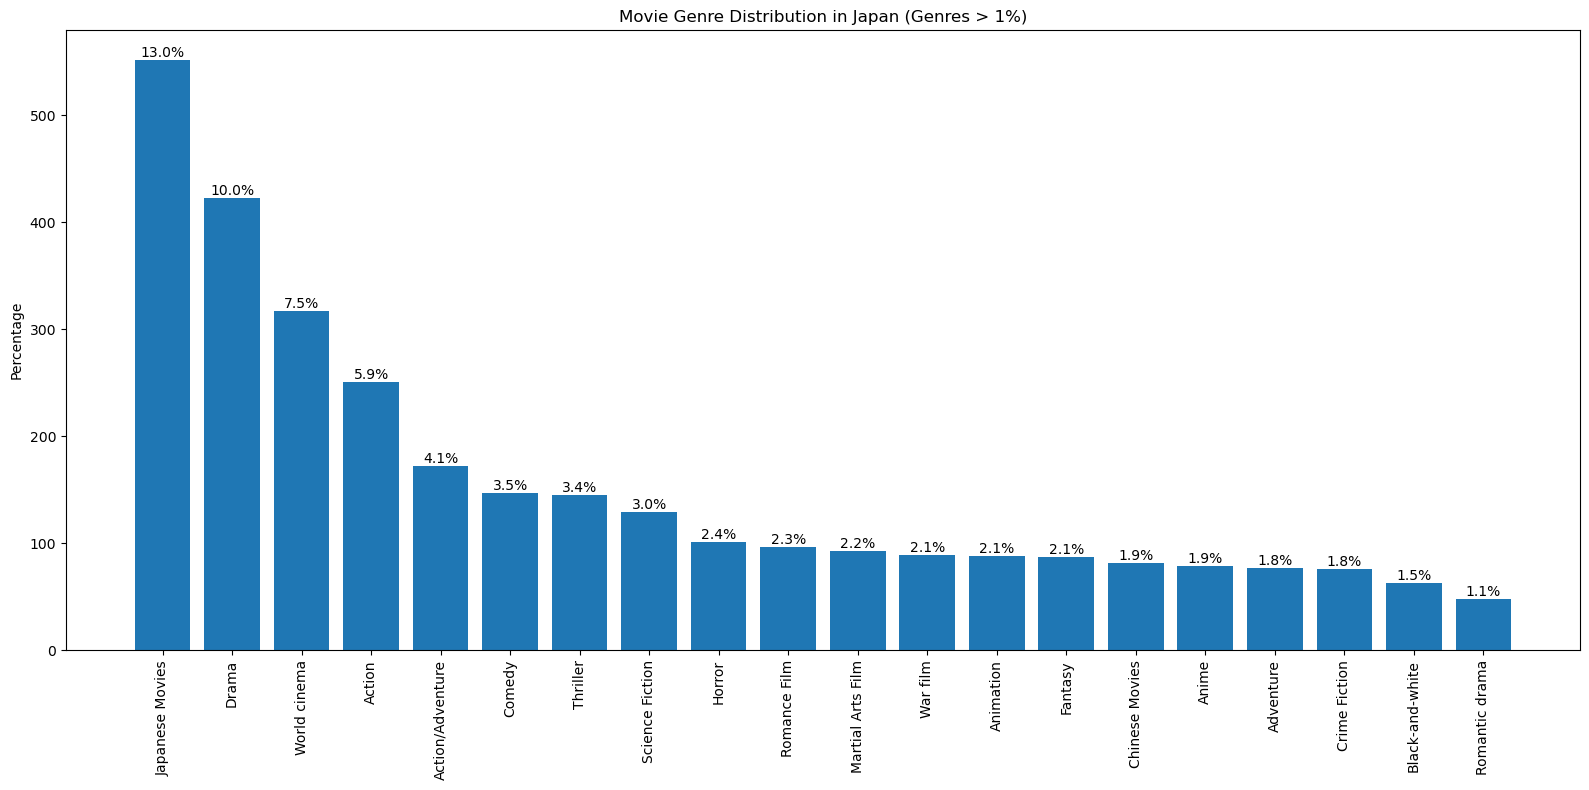

In [14]:
location = "Japan"
genres = country_genre[location]
visualize_genres(location, genres)

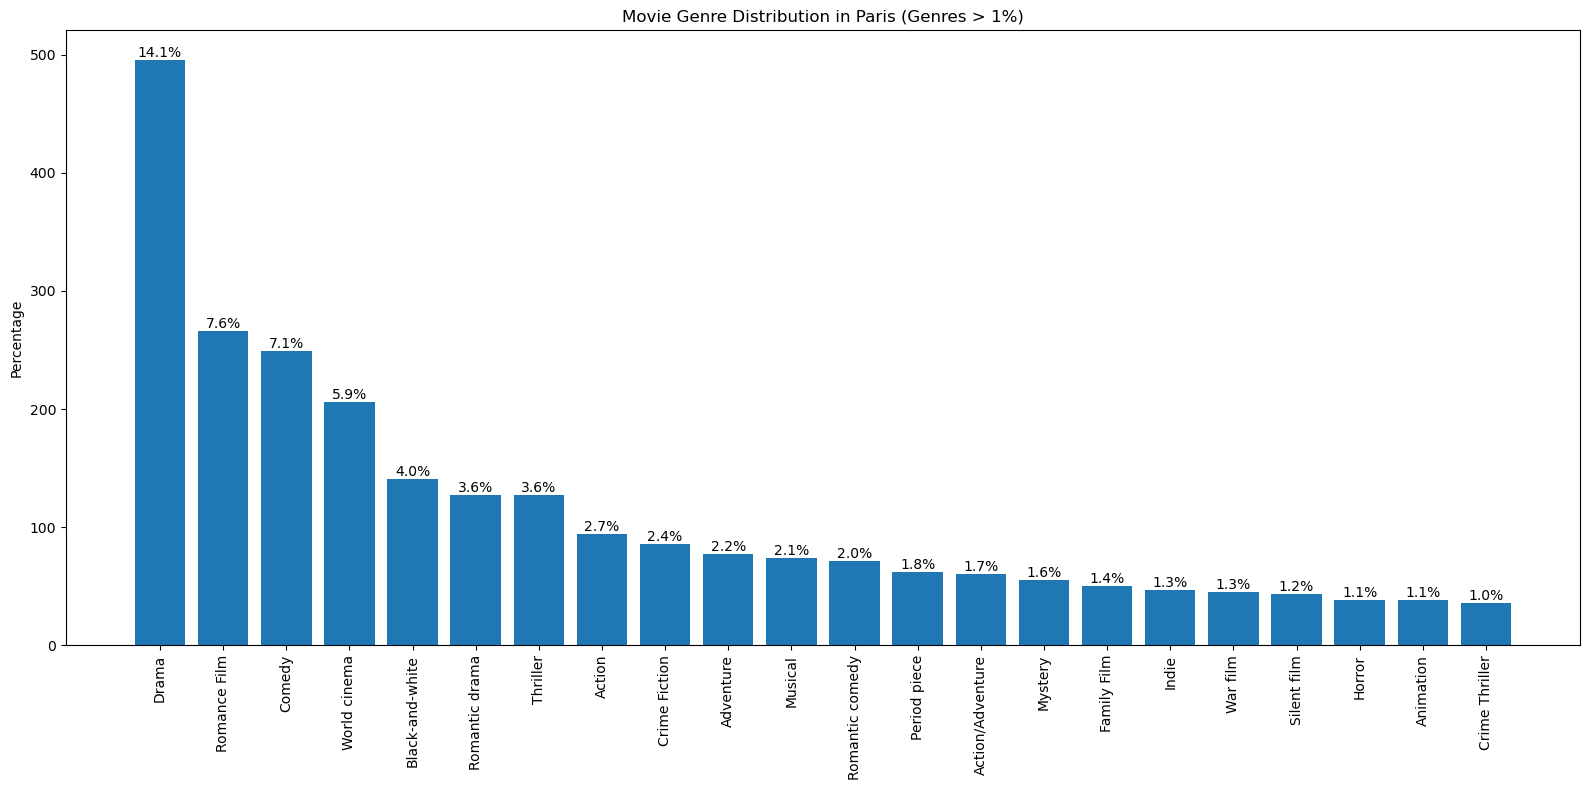

In [15]:
location = "Paris"
genres = city_genre[location]
visualize_genres(location, genres)